In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, cv2

from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D, GlobalAveragePooling2D, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop, SGD
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

Using TensorFlow backend.


In [2]:
# Load data train
def load_data():
    
    dataset_train = np.loadtxt("C:/Users/MATIAS/DL-workshopUCC/data/DL_DB_Train.csv", delimiter=",")
    
    dataset_test = np.loadtxt("C:/Users/MATIAS/DL-workshopUCC/data/DL_DB_Ver.csv", delimiter=",")
    
    # Separamos datos (X) de clases (Y) para entramiento
    X_Train = dataset_train[:,0:7]
    Y_Train = dataset_train[:,7]
    
    # Separamos datos (X) de clases (Y) para validacion
    X_Val = dataset_train[:,0:7]
    Y_Val = dataset_train[:,7]
    
    # Separamos datos (X) de clases (Y) para test
    X_Test = dataset_test[:,0:7]
          
    return X_Train, Y_Train, X_Test

# Split Data
def split_data(X_Train, Y_Train, percent_val):
    
    # Variables declarations
    total_items_x = len(X_Train)
    total_validation_x = int(percent_val * total_items_x / 100)
    
    total_items_y = len(Y_Train)
    total_validation_y = int(percent_val * total_items_y / 100)
    
    X_V = X_Train[:5]
    Y_V = Y_Train[:5]
    
    X_T = X_Train[5:-1]
    Y_T = Y_Train[5:-1]
   
    return X_T, Y_T, X_V, Y_V
    

In [3]:
# Get information
X_Train, Y_Train, X_Test = load_data()
X_Train, Y_Train, X_Val, Y_Val = split_data(X_Train, Y_Train, 20)

# create model
model = Sequential()
model.add(Dense(32,input_shape=(X_Train.shape[1],)))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(64,input_shape=(X_Train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(64,input_shape=(X_Train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(128,input_shape=(X_Train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(128,input_shape=(X_Train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(256,input_shape=(X_Train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(256,input_shape=(X_Train.shape[1],)))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(2))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                256       
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
activation_3 (Activation)    (None, 64)                0         
__________

In [4]:
# Cargamos una red pre entrenada a causa de tener pocos datos para entrenar una red desde cero
weights = os.path.join('', 'weights/weights.h5')
callbacks = [ModelCheckpoint(weights, monitor='val_loss', save_best_only=True, verbose=0)]

In [5]:
# Compile model
# Utilizamos un algoritmo loss binary por que debe clasificar
# Utilizamos una metrica accuracy por que es un problema de clasificación
rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(loss='binary_crossentropy', optimizer=rmsprop, metrics=['accuracy'])

In [6]:
# Fit the model
history = model.fit(X_Train, Y_Train, epochs=150, batch_size=10, verbose=1, validation_data = (X_Val, Y_Val), callbacks=callbacks)

Train on 93 samples, validate on 5 samples
Epoch 1/150
93/93 [==============================] - 0s 4ms/step - loss: 1.5096 - acc: 0.5914 - val_loss: 1.0463 - val_acc: 0.8000
Epoch 2/150
93/93 [==============================] - 0s 367us/step - loss: 0.9381 - acc: 0.6022 - val_loss: 0.5671 - val_acc: 0.8000
Epoch 3/150
93/93 [==============================] - 0s 367us/step - loss: 0.7287 - acc: 0.6237 - val_loss: 0.5329 - val_acc: 0.8000
Epoch 4/150
93/93 [==============================] - 0s 366us/step - loss: 0.7471 - acc: 0.5806 - val_loss: 0.5180 - val_acc: 0.8000
Epoch 5/150
93/93 [==============================] - 0s 604us/step - loss: 0.6274 - acc: 0.6667 - val_loss: 0.4709 - val_acc: 0.8000
Epoch 6/150
93/93 [==============================] - 0s 679us/step - loss: 0.7798 - acc: 0.6022 - val_loss: 0.5508 - val_acc: 0.8000
Epoch 7/150
93/93 [==============================] - 0s 507us/step - loss: 0.6898 - acc: 0.6344 - val_loss: 0.4529 - val_acc: 0.8000
Epoch 8/150
93/93 [=========

Epoch 62/150
93/93 [==============================] - 0s 410us/step - loss: 0.5180 - acc: 0.7204 - val_loss: 0.4035 - val_acc: 0.8000
Epoch 63/150
93/93 [==============================] - 0s 388us/step - loss: 0.5036 - acc: 0.7312 - val_loss: 0.3080 - val_acc: 0.8000
Epoch 64/150
93/93 [==============================] - 0s 410us/step - loss: 0.4657 - acc: 0.7849 - val_loss: 0.3619 - val_acc: 0.8000
Epoch 65/150
93/93 [==============================] - 0s 431us/step - loss: 0.4862 - acc: 0.7204 - val_loss: 0.3040 - val_acc: 0.8000
Epoch 66/150
93/93 [==============================] - 0s 334us/step - loss: 0.4965 - acc: 0.7312 - val_loss: 0.3385 - val_acc: 0.8000
Epoch 67/150
93/93 [==============================] - 0s 399us/step - loss: 0.5402 - acc: 0.8172 - val_loss: 0.4278 - val_acc: 0.8000
Epoch 68/150
93/93 [==============================] - 0s 420us/step - loss: 0.4511 - acc: 0.7849 - val_loss: 0.4092 - val_acc: 0.8000
Epoch 69/150
93/93 [==============================] - 0s 442us

Epoch 123/150
93/93 [==============================] - 0s 356us/step - loss: 0.3859 - acc: 0.7849 - val_loss: 0.3471 - val_acc: 0.8000
Epoch 124/150
93/93 [==============================] - 0s 345us/step - loss: 0.5550 - acc: 0.7634 - val_loss: 0.3657 - val_acc: 0.8000
Epoch 125/150
93/93 [==============================] - 0s 485us/step - loss: 0.6237 - acc: 0.8065 - val_loss: 0.3384 - val_acc: 0.8000
Epoch 126/150
93/93 [==============================] - 0s 431us/step - loss: 0.4362 - acc: 0.8065 - val_loss: 0.3739 - val_acc: 0.8000
Epoch 127/150
93/93 [==============================] - 0s 474us/step - loss: 0.4796 - acc: 0.7419 - val_loss: 0.3763 - val_acc: 0.8000
Epoch 128/150
93/93 [==============================] - 0s 496us/step - loss: 0.4015 - acc: 0.7849 - val_loss: 0.2650 - val_acc: 0.8000
Epoch 129/150
93/93 [==============================] - 0s 496us/step - loss: 0.3744 - acc: 0.8065 - val_loss: 0.2457 - val_acc: 0.8000
Epoch 130/150
93/93 [==============================] - 

In [7]:
# evaluate the model
scores = model.evaluate(X_Val, Y_Val)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

5/5 [==============================] - 0s 205us/step

acc: 100.00%


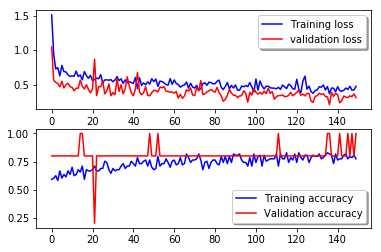

In [8]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)
plt.show()

In [9]:
# calculate predictions
predictions = model.predict(X_Test)
# round predictions
rounded = [round(x[0]) for x in predictions]
print(rounded)

[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0]
